In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("merged_dataset.csv")
df.head()

,Num_Acc,date,hour,minute,lighting,intersection,atmosphere,collision,postal_address,localisation,...,user_sex,pedestrian_action,vehicle_ID,road_category,traff_regime,no_traff_lanes,longitud_profile,drawing_plan,surface_cond,acc_situation
0,201600000001,2016-01-02,14,45,Full day,Out of intersection,Cloudy weather,By the side,"46, rue Sonneville",In built-up areas,...,Male,not specified,A01,Departmental Road,Bidirectional,0.0,Dish,Curved right,normal,On the road
1,201600000002,2016-03-16,18,0,Full day,Giratory,Normal,Other,1a rue du cimetière,In built-up areas,...,Female,not specified,A01,Departmental Road,One way,0.0,Dish,Curved left,normal,On the road
2,201600000003,2016-07-13,19,0,Full day,Out of intersection,Normal,Other,None,Out of agglomeration,...,Male,Opposite direction of the vehicle,A01,Departmental Road,Bidirectional,2.0,Dish,Curved right,wet,On the verge
3,201600000004,2016-08-15,19,30,Twilight or dawn,Out of intersection,Dazzling weather,By the side,52 rue victor hugo,In built-up areas,...,Male,not specified,B02,Communal Way,Bidirectional,0.0,Dish,Straight part,normal,On the road
4,201600000005,2016-12-23,11,0,Full day,T Intersection,Normal,By the side,rue Joliot curie,In built-up areas,...,Female,not specified,B02,Communal Way,Bidirectional,0.0,Dish,Straight part,normal,On the road


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Num_Acc            839985 non-null  int64  
 1   date               839985 non-null  object 
 2   hour               839985 non-null  int64  
 3   minute             839985 non-null  int64  
 4   lighting           839985 non-null  object 
 5   intersection       839985 non-null  object 
 6   atmosphere         839985 non-null  object 
 7   collision          839985 non-null  object 
 8   postal_address     839985 non-null  object 
 9   localisation       839985 non-null  object 
 10  user_category      839985 non-null  object 
 11  accident_severity  839985 non-null  object 
 12  user_sex           839985 non-null  object 
 13  pedestrian_action  839985 non-null  object 
 14  vehicle_ID         839985 non-null  object 
 15  road_category      839985 non-null  object 
 16  tr

In [5]:
sns.set_style("whitegrid")
df["date"] = pd.to_datetime(df["date"])
acc = df["accident_severity"]

## Date & time variations
- There is a **yearly** decrease in accident count
- The **month** and **weekday** do not show signoficant change in accident count
- The **hourly** accident count has a large variation, it is no doubt that more or less accidents occur at different times of the day

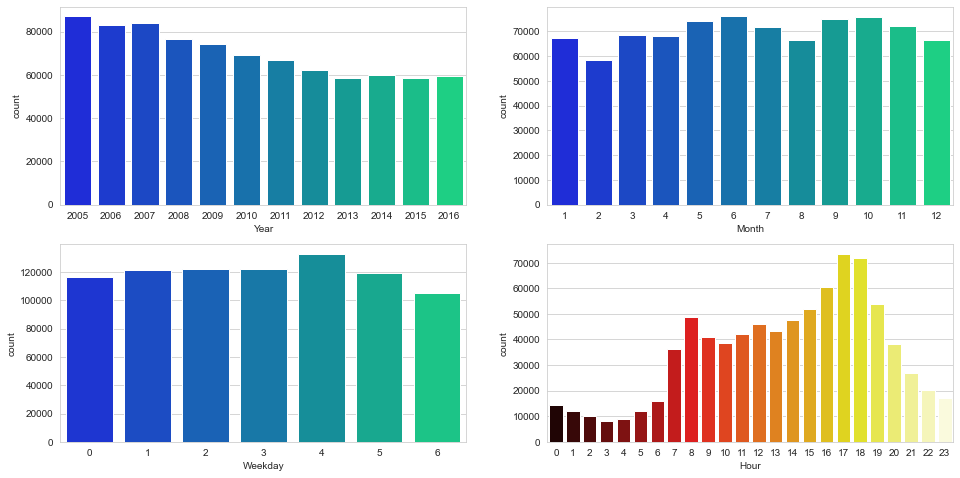

In [6]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,8)

sns.countplot(x=df["date"].dt.year, palette="winter", ax=axes[0,0]).set(xlabel="Year")
sns.countplot(x=df["date"].dt.month, palette="winter", ax=axes[0,1]).set(xlabel="Month")
sns.countplot(x=df["date"].dt.weekday, palette="winter", ax=axes[1,0]).set(xlabel="Weekday")
sns.countplot(x=df["hour"], palette="hot", ax=axes[1,1]).set(xlabel="Hour")

plt.show()

### Time Based Variations on Accident Severity
The distribution of **accident severity** remains almost constant accross different time interval, except in the hourly variation. Hence none of the date & time variables except **hour** would be beneficial in predicting accident severity.

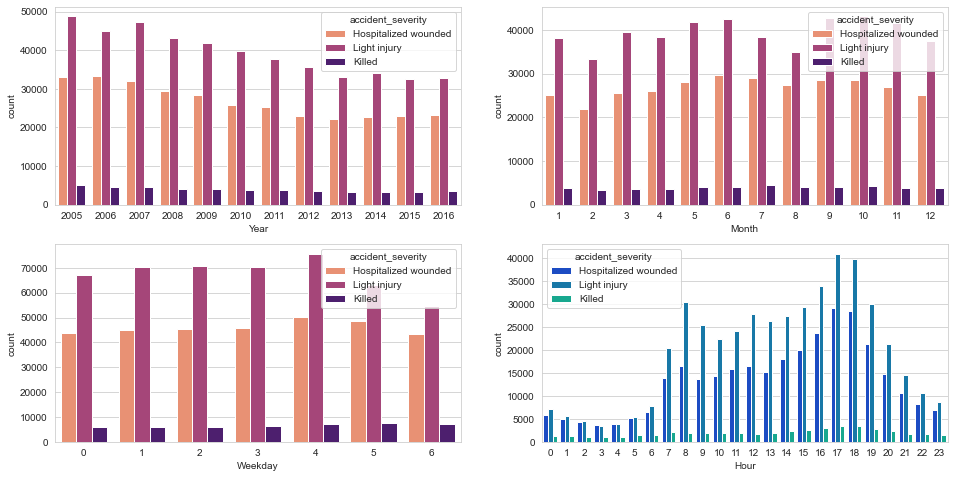

In [7]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,8)

sns.countplot(x=df["date"].dt.year, hue=acc, palette="magma_r", ax=axes[0,0]).set(xlabel="Year")
sns.countplot(x=df["date"].dt.month, hue=acc, palette="magma_r", ax=axes[0,1]).set(xlabel="Month")
sns.countplot(x=df["date"].dt.weekday, hue=acc, palette="magma_r", ax=axes[1,0]).set(xlabel="Weekday")
sns.countplot(x=df["hour"], hue=acc, palette="winter", ax=axes[1,1]).set(xlabel="Hour")

plt.show()

# Categorical Variations
All features of this dataset are categorical, the only logical analysis that can be done are based on occurance distribution (count)

In [8]:
def compare_plots(column, palette="Twilight"):
    fig, axes = plt.subplots(1,2)
    fig.set_size_inches(20,5)
    
    sns.countplot(x=column, order=column.value_counts().index, ec="Black", palette=palette, ax=axes[0])
    sns.countplot(x=column, order=column.value_counts().index, hue=acc, ec="Black", palette=palette, ax=axes[1])
    
    plt.show()

## Accident severity

<function matplotlib.pyplot.show(close=None, block=None)>

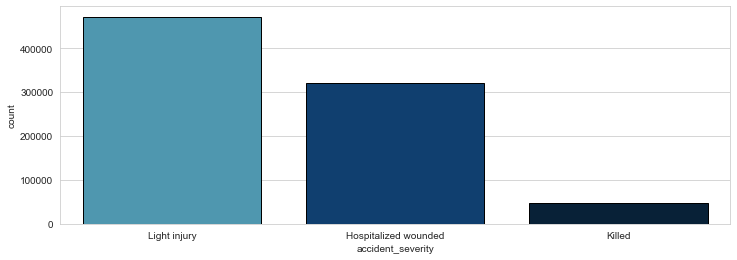

In [9]:
plt.figure(figsize=(12,4))
sns.countplot(x=df["accident_severity"], order=df["accident_severity"].value_counts().index, ec="Black", palette="ocean_r")
plt.show

## Lighting

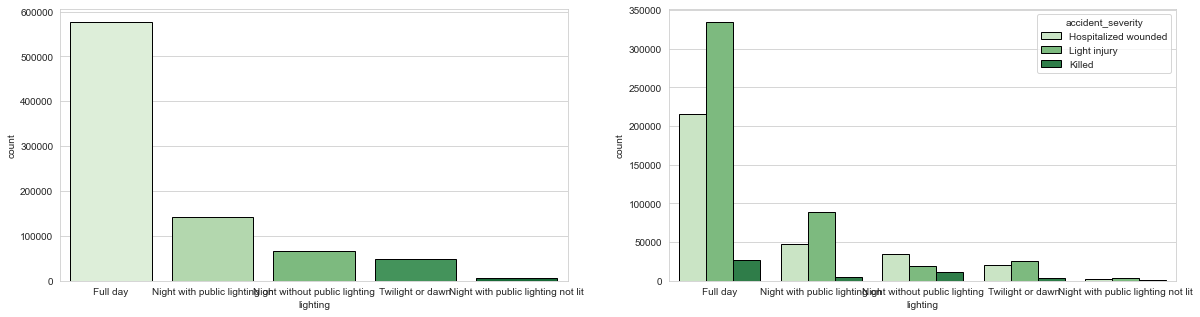

In [10]:
compare_plots(df["lighting"], "Greens")

## Intersection

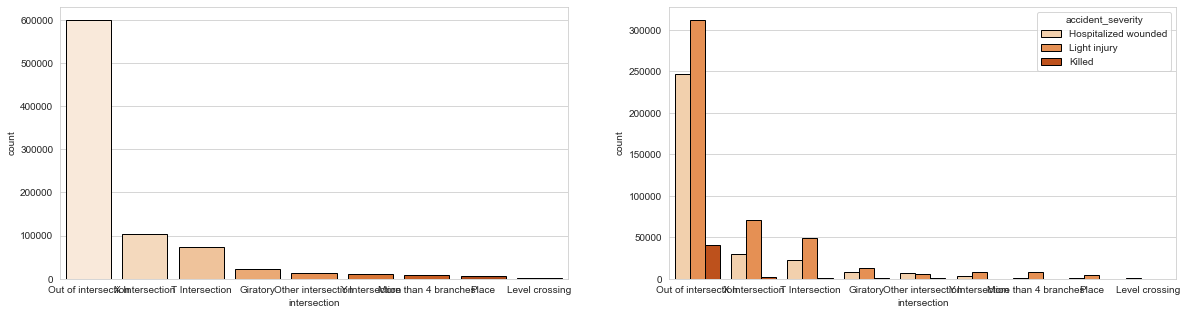

In [11]:
compare_plots(df["intersection"], "Oranges")

It experiences a high class imbalance, thus the classes were combined to only **Out of intersection** and **In intersection**

In [12]:
#df["intersection"].value_counts()

In [13]:
df["intersection"].replace(to_replace=["X Intersection", "T Intersection", "Giratory", "Other intersection",
                                       "Y Intersection", "More than 4 branches", "Place", "Level crossing"],
                           value="In intersection", inplace=True)

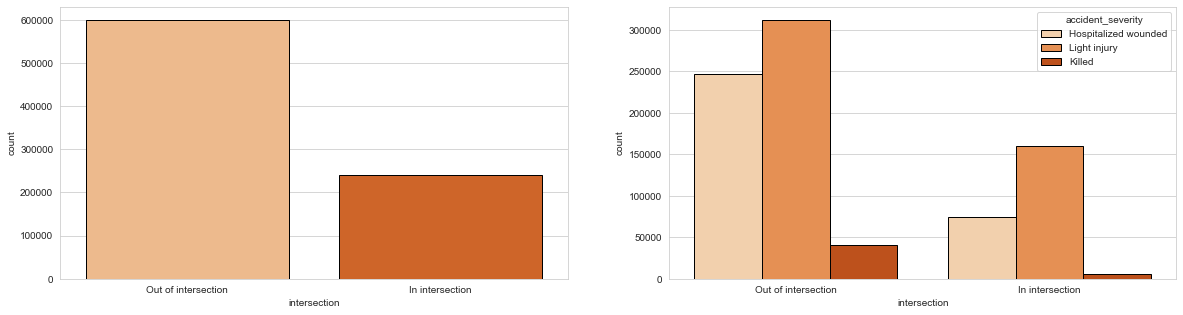

In [14]:
compare_plots(df["intersection"], "Oranges")

## Atmosphere
There is no significant cue as to how importance this feature will be in our prediction.<br>
More analysis will be done

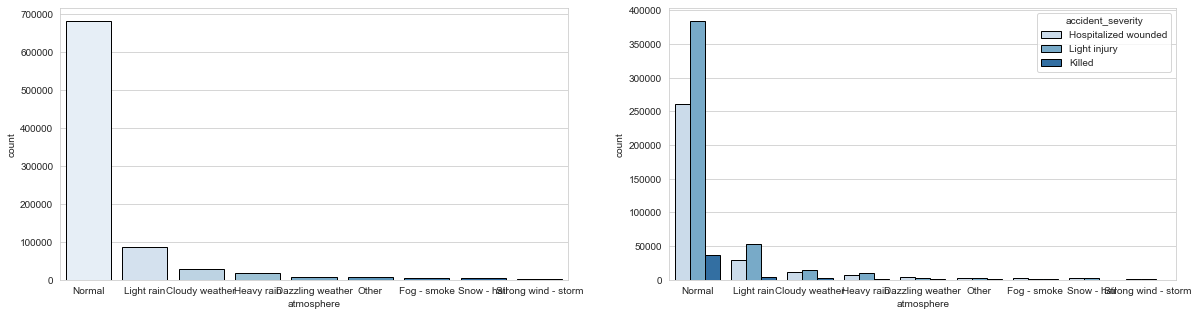

In [15]:
compare_plots(df["atmosphere"], "Blues")

## Collision
Accidents occuring at the **front** seems to result in more **hospitalized injury** cases

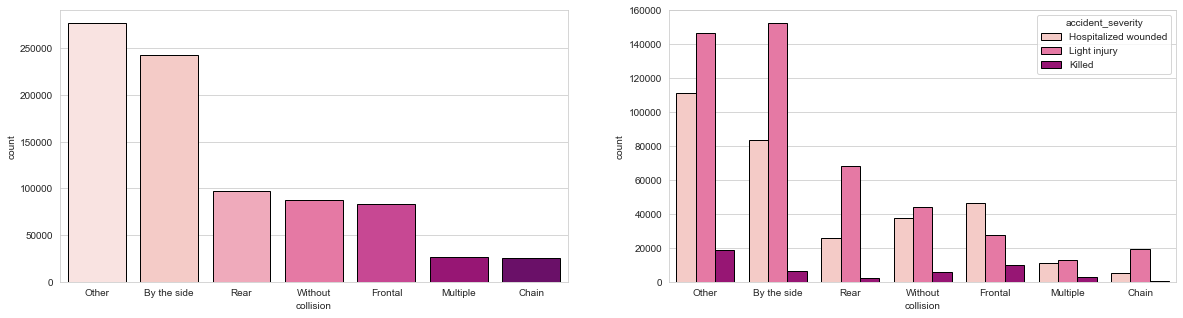

In [16]:
compare_plots(df["collision"], "RdPu")

## Localisation
Accidents occuring **Out of agglomeration** tend to lead to alot more **hospitalized injuries**

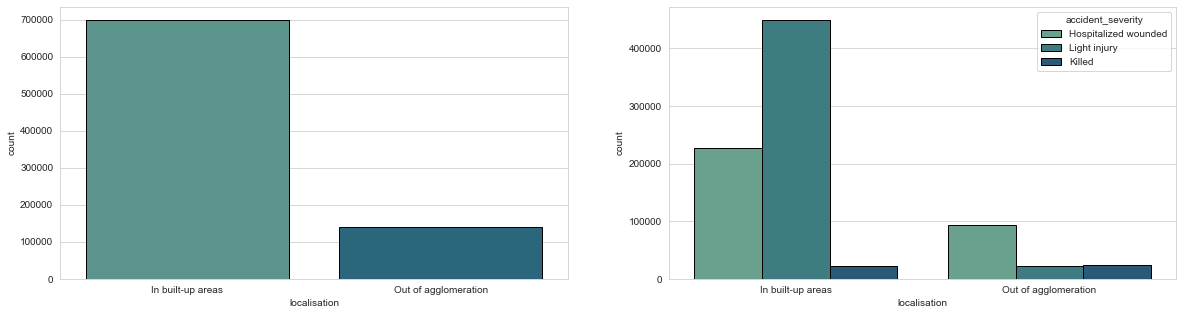

In [17]:
compare_plots(df["localisation"], "crest")

## User Category
Further analysis should be done

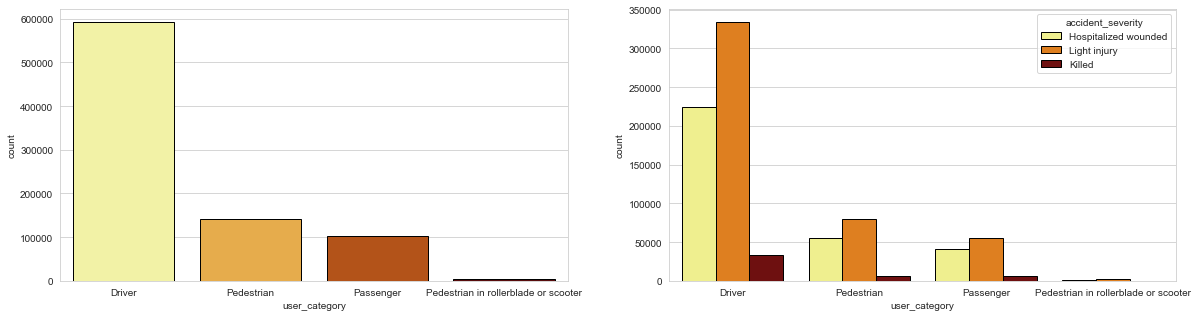

In [18]:
compare_plots(df["user_category"], "afmhot_r")

## User Sex
This feature should be dropped as it is not a direct predictor of the severity of an accident

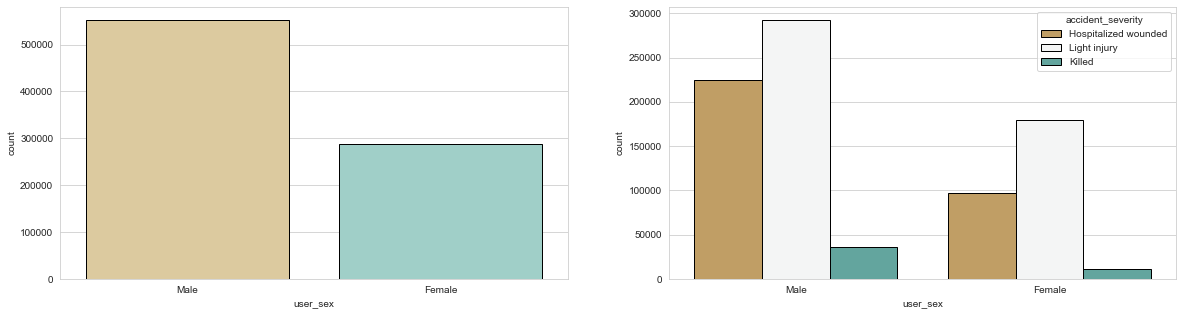

In [19]:
compare_plots(df["user_sex"], "BrBG")

## Pedestrian Action

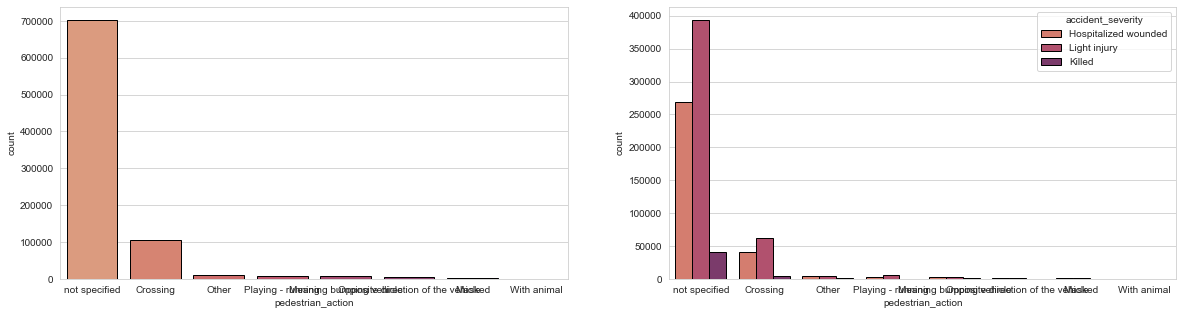

In [20]:
compare_plots(df["pedestrian_action"], "flare")

## Road Category
Shows great variation against accident severity

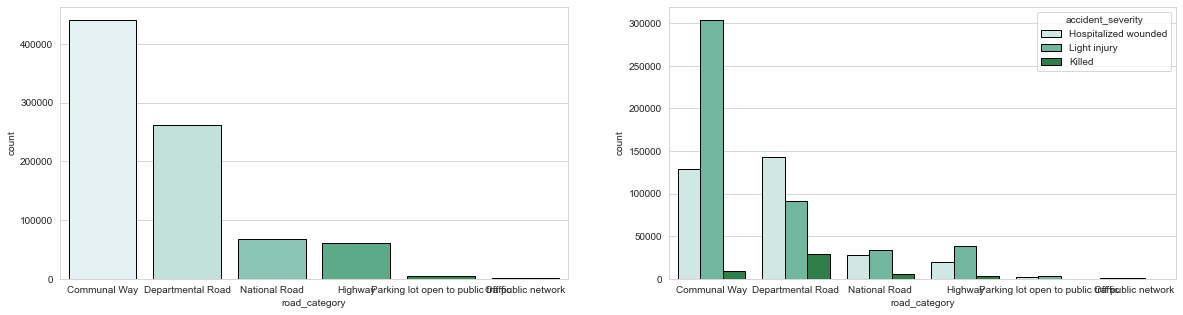

In [21]:
compare_plots(df["road_category"], "BuGn")

## Traffic Regime

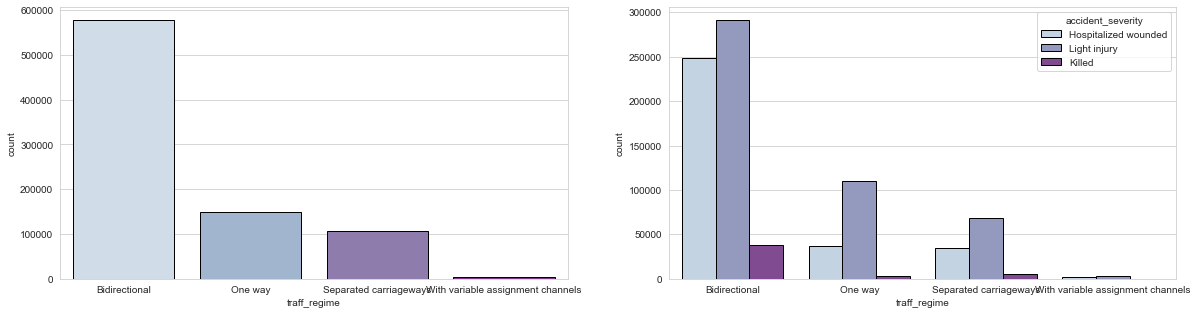

In [22]:
compare_plots(df["traff_regime"], "BuPu")

## Number of traffic lanes
This column can be dropped as it seems to have incorrect values.<br>
A road of 50 traffic lanes is unreal

In [23]:
df["no_traff_lanes"].value_counts()

2.0     466506
0.0     102796
1.0     101345
4.0      76934
3.0      66252
6.0      13945
5.0       7839
8.0       2332
7.0        840
10.0       407
20.0       241
50.0       158
9.0        148
11.0        32
12.0        32
40.0        30
30.0        27
13.0        15
25.0        14
21.0        11
26.0         9
15.0         8
90.0         7
24.0         6
14.0         6
22.0         5
70.0         5
60.0         3
31.0         3
16.0         2
53.0         2
45.0         2
27.0         2
17.0         2
65.0         1
84.0         1
39.0         1
54.0         1
29.0         1
62.0         1
99.0         1
42.0         1
41.0         1
36.0         1
44.0         1
33.0         1
52.0         1
28.0         1
91.0         1
86.0         1
76.0         1
23.0         1
18.0         1
Name: no_traff_lanes, dtype: int64

In [24]:
df.drop(columns="no_traff_lanes", inplace=True)

## Longitudinal Profile

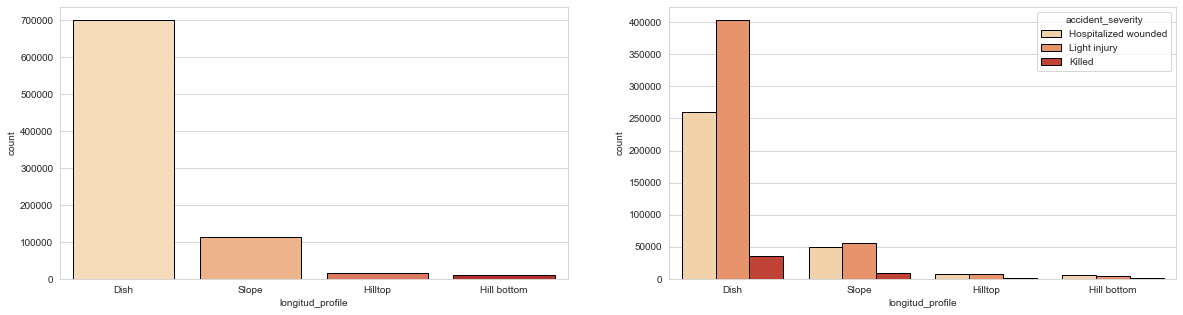

In [25]:
compare_plots(df["longitud_profile"], "OrRd")

## Drawing Plan

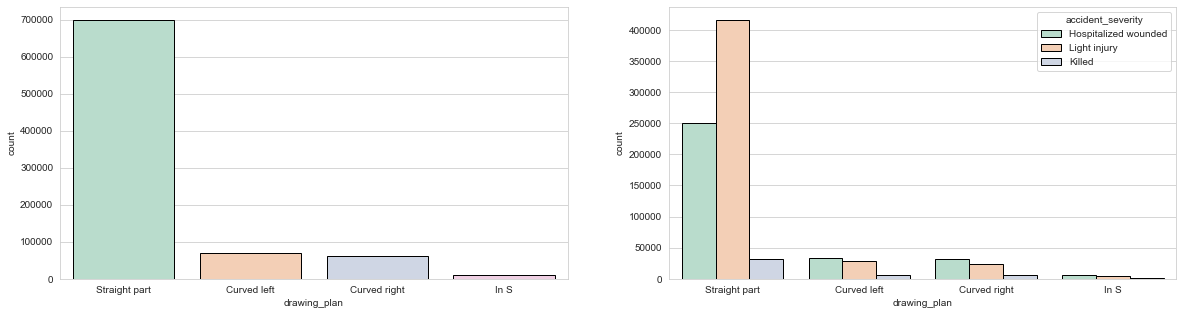

In [26]:
compare_plots(df["drawing_plan"], "Pastel2")

## Surface Condition

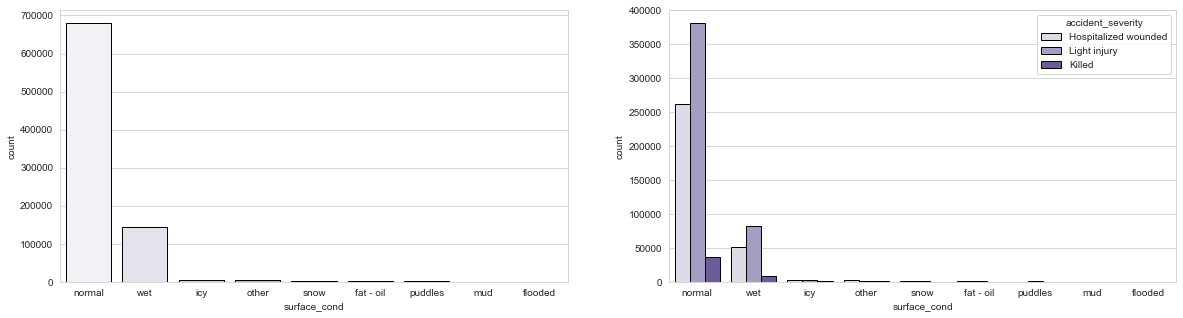

In [27]:
compare_plots(df["surface_cond"], "Purples")

Experiences a class imbalance<br>
Classes can be grouped to just **normal** and **not normal**

In [28]:
#df["surface_cond"].value_counts()

In [29]:
df["surface_cond"].replace(to_replace=["wet", "icy", "other", "snow", "fat - oil", "puddles", "mud", "flooded"],
                           value="not normal", inplace=True)

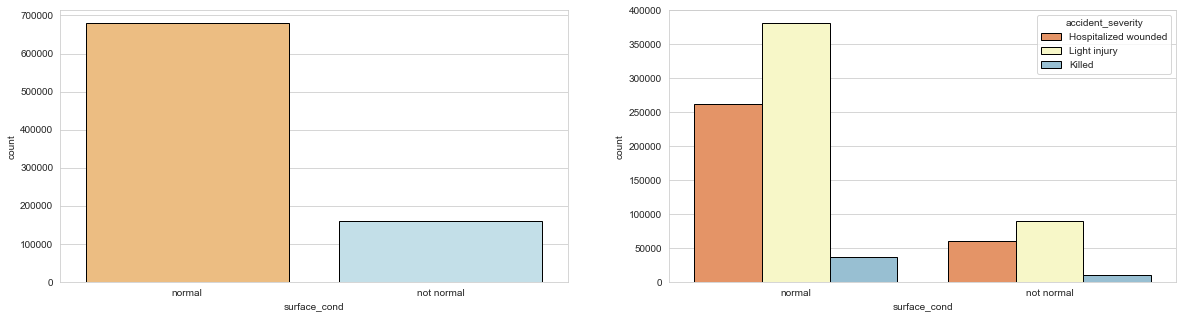

In [30]:
compare_plots(df["surface_cond"], "RdYlBu")

## Accident Situation

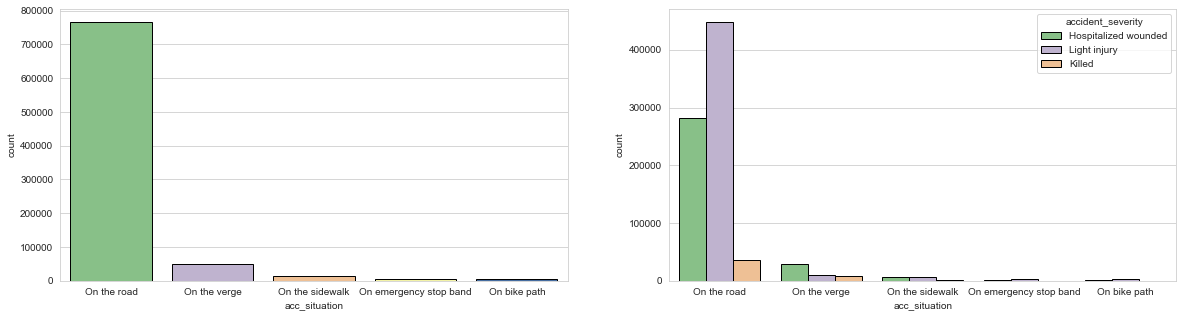

In [31]:
compare_plots(df["acc_situation"], "Accent")

In [32]:
df["acc_situation"].value_counts()

On the road               766362
On the verge               48818
On the sidewalk            14493
On emergency stop band      5191
On bike path                5121
Name: acc_situation, dtype: int64

Classes are grouped to accidents **On the road** and **Off the road** 

In [33]:
df["acc_situation"].replace(to_replace=["On the verge", "On the sidewalk", "On emergency stop band", "On bike path"],
                                        value="Off the road", inplace=True)

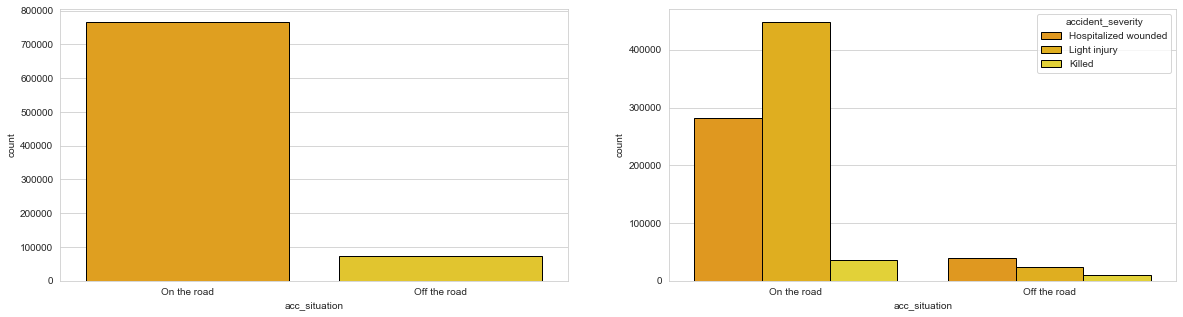

In [34]:
compare_plots(df["acc_situation"], "Wistia_r")

## Dropping columns

- **Accident ID, Minute, Vehicle ID and Postal Address** should not be used in our prediction, as these features do not influence real life accident situations in any logical way
- The **date** column can be dropped as the analysis above shows there is no much variation on accident severity across different date intervals.

In [35]:
df.drop(columns=["Num_Acc", "vehicle_ID", "postal_address", "minute", "date"], inplace=True)

In [36]:
df.head()

,hour,lighting,intersection,atmosphere,collision,localisation,user_category,accident_severity,user_sex,pedestrian_action,road_category,traff_regime,longitud_profile,drawing_plan,surface_cond,acc_situation
0,14,Full day,Out of intersection,Cloudy weather,By the side,In built-up areas,Driver,Hospitalized wounded,Male,not specified,Departmental Road,Bidirectional,Dish,Curved right,normal,On the road
1,18,Full day,In intersection,Normal,Other,In built-up areas,Passenger,Hospitalized wounded,Female,not specified,Departmental Road,One way,Dish,Curved left,normal,On the road
2,19,Full day,Out of intersection,Normal,Other,Out of agglomeration,Pedestrian,Hospitalized wounded,Male,Opposite direction of the vehicle,Departmental Road,Bidirectional,Dish,Curved right,not normal,Off the road
3,19,Twilight or dawn,Out of intersection,Dazzling weather,By the side,In built-up areas,Driver,Hospitalized wounded,Male,not specified,Communal Way,Bidirectional,Dish,Straight part,normal,On the road
4,11,Full day,In intersection,Normal,By the side,In built-up areas,Passenger,Hospitalized wounded,Female,not specified,Communal Way,Bidirectional,Dish,Straight part,normal,On the road


In [37]:
df.to_csv("model_dataset.csv", index=False)

*****

# Feature Importance
Further analysis can be done as a safe check to avoid dropping any important feature.<br>
A simple random forest algorithm can be used to estimate feature importance

In [38]:
#!unzip merged_dataset.zip

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report

In [40]:
le = LabelEncoder()

for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [41]:
X = df.drop(columns=["accident_severity"])
Y = df["accident_severity"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [42]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [43]:
y_pred = rnd_clf.predict(x_test)

In [44]:
# Quick metrices report
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,2,accuracy,macro avg,weighted avg
precision,0.567037,0.199149,0.685431,0.639788,0.483872,0.613025
recall,0.457188,0.066786,0.821222,0.639788,0.448398,0.639788
f1-score,0.506222,0.100027,0.747207,0.639788,0.451152,0.618883
support,96549.000000,14015.000000,141432.000000,0.639788,251996.000000,251996.000000


Model is suffering from a class imbalance, but this will be ignored as we just need rough estimates

In [45]:
scores = {}

# Get feature importance from the model
for feature, score in zip(x_train.columns, rnd_clf.feature_importances_):
  scores[feature] = score

# Sort the scores from highest to lowest
scores = sorted(scores.items(), key=lambda x:x[1], reverse=True)

for key, value in scores:
  print(key, value)

hour 0.28346912266444435
localisation 0.13553806011319713
road_category 0.09992200878799223
collision 0.08889660190159547
atmosphere 0.06865558207494099
traff_regime 0.05251497684723403
lighting 0.047928135711415465
drawing_plan 0.04614307512587648
longitud_profile 0.041762844091881524
user_category 0.03347500221803737
pedestrian_action 0.023127232289003465
user_sex 0.02087601121793832
acc_situation 0.01936632582036612
intersection 0.019294445546780115
surface_cond 0.01903057558929695


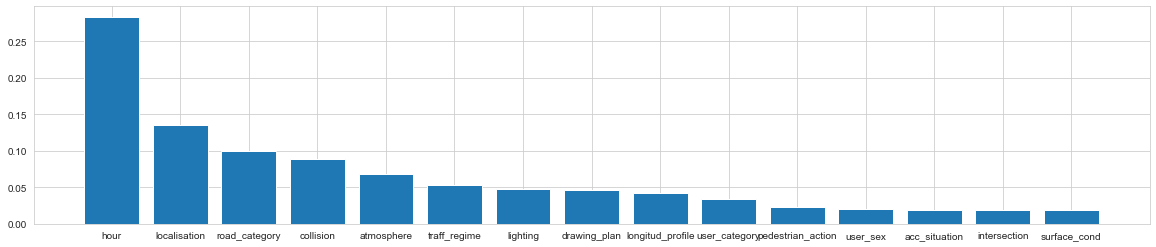

In [46]:
# Plot metrices
s = dict(scores)
plt.figure(figsize=(20,4))
plt.bar(range(len(s)), list(s.values()))
plt.xticks(range(len(s)), list(s.keys()))
plt.show()